In [3]:
%matplotlib inline
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
data_path_write='C:\\Users\\lavan\\Desktop\\data science\\G_Suite_Metrics-master_timeprediction\\G_Suite_Metrics-master\\src\\lavanya'
data = pd.read_csv('google_drive_nanreplaced.csv')

In [19]:

data.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [20]:
def pick_your_number(number):
    if (number == 1):
        df=data[['time','1day_active_users','30day_active_users']]
        print("you picked google drive 1day active users and 30 day active users")
    if (number == 2):
        df=data
        print("you picked the entire data set")
    if (number ==3):
        df= data[['time','google_forms_created','google_forms_edited','1day_active_users','30day_active_users']]
        print("you picked 5 attributes")
    #else:
        #df=[]
        #print("you didn't pick any dataset")
    return df

In [21]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df = df.set_index(df.columns[0])
    return df

In [22]:

def plot(df,df0, time):
    #Plt.plot requires the index to be a time series, if the df index is not a time series then this if condition will set it
    if(time == True):
        df1 = df.copy()
        df2 = df0.copy()
        df1 = time_set(df1)
        df2 = time_set(df2)
    elif(time == False):
        df1 = df.copy()
        df2 = df0.copy()
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

In [23]:
def timeprediction123(df,csvfilename):
    p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='180 days', horizon = '180 days')
    
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    df3 = df1
    df3 = df.rename(columns={df.columns[0]: "time", df.columns[1]: csvfilename})
    df3.to_csv(data_path_write + csvfilename + "_prediction" + ".csv", index = False)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [24]:
def timeprediction_cut_off_attributes(df,csvfilename):
    p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='30 days', period='50 days', horizon = '100 days')
    
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    df3 = df1
    df3 = df.rename(columns={df.columns[0]: "time", df.columns[1]: csvfilename})
    df3.to_csv(data_path_write + csvfilename + "_prediction" + ".csv", index = False)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [25]:
def timepredictionMAPE(df,csvfilename):
    p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='370 days', period='180 days', horizon = '365 days')
    try:
        print("MAPE for " + csvfilename + " predictions")
        fig = plot_cross_validation_metric(df_cv, metric='mape')
    except:
        print("MAPE way too low to be graphed, prediction is very good")
    df2 = time_pred[['yhat']]
    return df1,df2,time_pred

In [26]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : five_att.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

In [27]:
def send_predictionMAPE(df):
    df_with_all_preds = timepredictionMAPE(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : five_att.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timepredictionMAPE(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

In [28]:
def fill_zero(df1, pred):
    df1 = time_set(df1)
    pred = time_set(pred)
    pred = pred.apply(np.ceil)
    
    idx = pd.date_range('03-23-2015', '08-17-2019')
    df1 = df1.reindex(idx, fill_value = 0)
    #This for loop changes all negative values to 0 in the prediction
    for x in range(len(pred.columns)):
        for j in range(len(pred)):
            if(pred[pred.columns[x]].iloc[j] < 0 ):
                pred[pred.columns[x]].iloc[j] = 0
    #Fills 0s in the original dataset with predicted values
    for x in range(len(df1.columns)):
        for j in range(len(df1)):
            if(df1[df1.columns[x]].iloc[j] == 0):
                df1[df1.columns[x]].iloc[j] = pred[pred.columns[x]].iloc[j]
    
        
    return df1,pred

In [29]:
def print_each_attr(df, isTimeSeries):
    df1 = df.copy()
    if(isTimeSeries == True):
        df1 = time_set(df1)
        
    for x in range (len(df1.columns)):
        n = df1[[df1.columns[x]]]
        n.to_csv(data_path_write2 + df1.columns[x] + ".csv", index = True)

In [30]:
five_att = pick_your_number(1)

you picked google drive 1day active users and 30 day active users


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-08-22 00:00:00 and 2019-02-18 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for 1day_active_users
  horizon           mse         rmse          mae      mape  coverage
0 18 days  2.034417e+06  1426.329806  1226.334652  0.241519  0.442857
1 19 days  2.180233e+06  1476.561209  1263.975932  0.250412  0.428571
2 20 days  2.261559e+06  1503.848086  1301.427572  0.258341  0.385714
3 21 days  2.366356e+06  1538.296471  1331.877671  0.260457  0.371429
4 22 days  2.473834e+06  1572.842781  1367.497287  0.264393  0.357143
Performance tail for 1day_active_users
     horizon           mse         rmse          mae      mape  coverage
158 176 days  7.109558e+06  2666.375475  2185.369704  0.481123  0.857143
159 177 days  6.663106e+06  2581.299240  2103.476649  0.464821  0.914286
160 178 days  6.732526e+06  2594.711123  2143.518407  0.476984  0.914286
161 179 days  6.556305e+06  2560.528174  2121.407616  0.476996  0.942857
162 180 days  7.165427e+06  2676.831484  2210.710850  0.485726  0.914286


INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-08-22 00:00:00 and 2019-02-18 00:00:00


Performance head for 30day_active_users
  horizon           mse         rmse          mae      mape  coverage
0 18 days  3.399674e+06  1843.820383  1486.648042  0.084270  0.628571
1 19 days  3.808647e+06  1951.575495  1595.338604  0.090094  0.600000
2 20 days  4.283714e+06  2069.713517  1708.141065  0.096087  0.571429
3 21 days  4.797341e+06  2190.283235  1821.140685  0.102053  0.542857
4 22 days  5.383506e+06  2320.238392  1938.544457  0.108263  0.514286
Performance tail for 30day_active_users
     horizon           mse           rmse           mae      mape  coverage
158 176 days  1.012211e+10  100608.705961  72246.647050  4.260692  0.371429
159 177 days  1.077449e+10  103800.245087  74446.560612  4.362256  0.400000
160 178 days  1.146662e+10  107082.289335  76771.538036  4.472994  0.400000
161 179 days  1.221283e+10  110511.685860  79207.590579  4.595073  0.400000
162 180 days  1.302258e+10  114116.524568  81749.014146  4.714697  0.400000


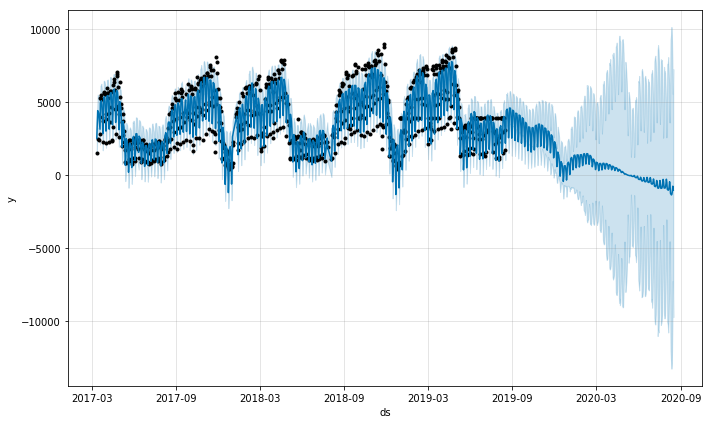

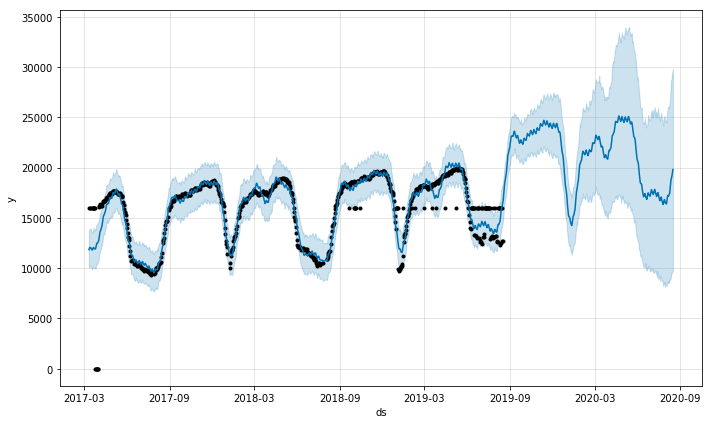

In [31]:
prediction = send_prediction(five_att)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-08-17 00:00:00 and 2018-08-17 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for 1day_active_users predictions


INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-08-17 00:00:00 and 2018-08-17 00:00:00


MAPE for 30day_active_users predictions


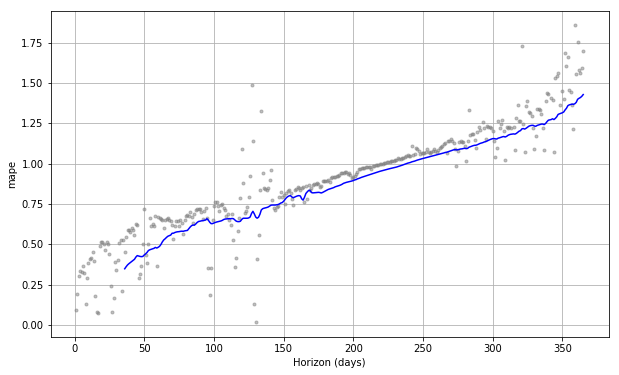

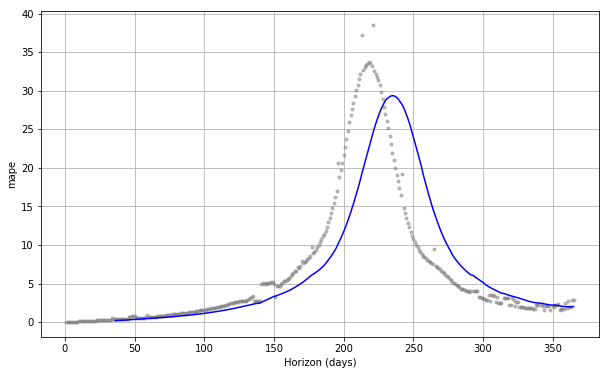

In [32]:
prediction1 = send_predictionMAPE(five_att)

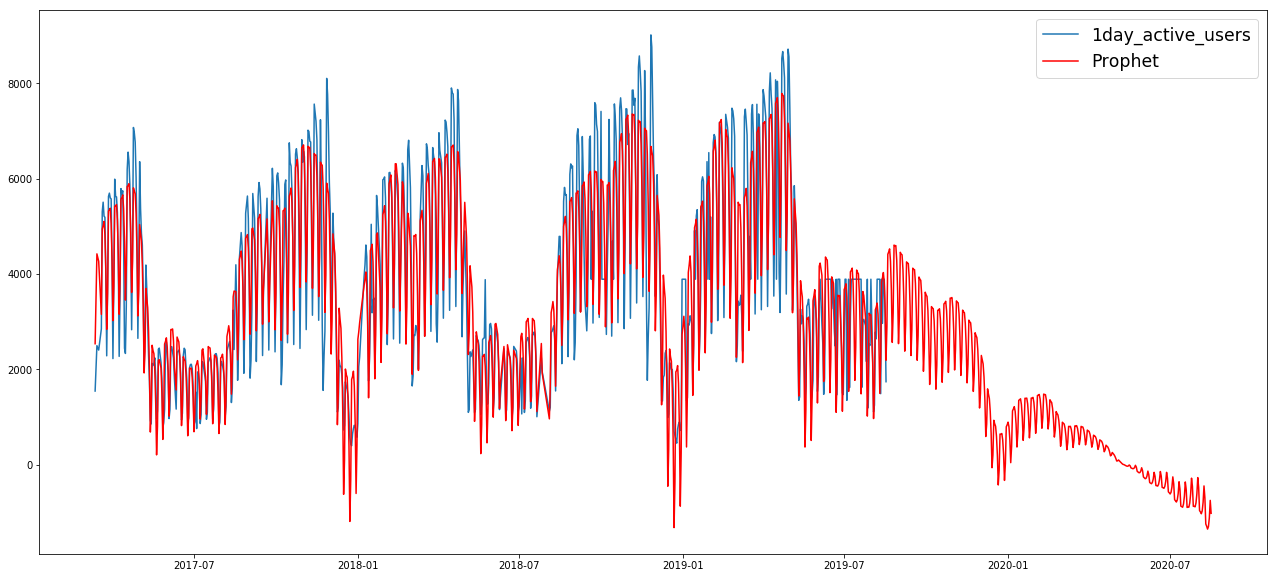

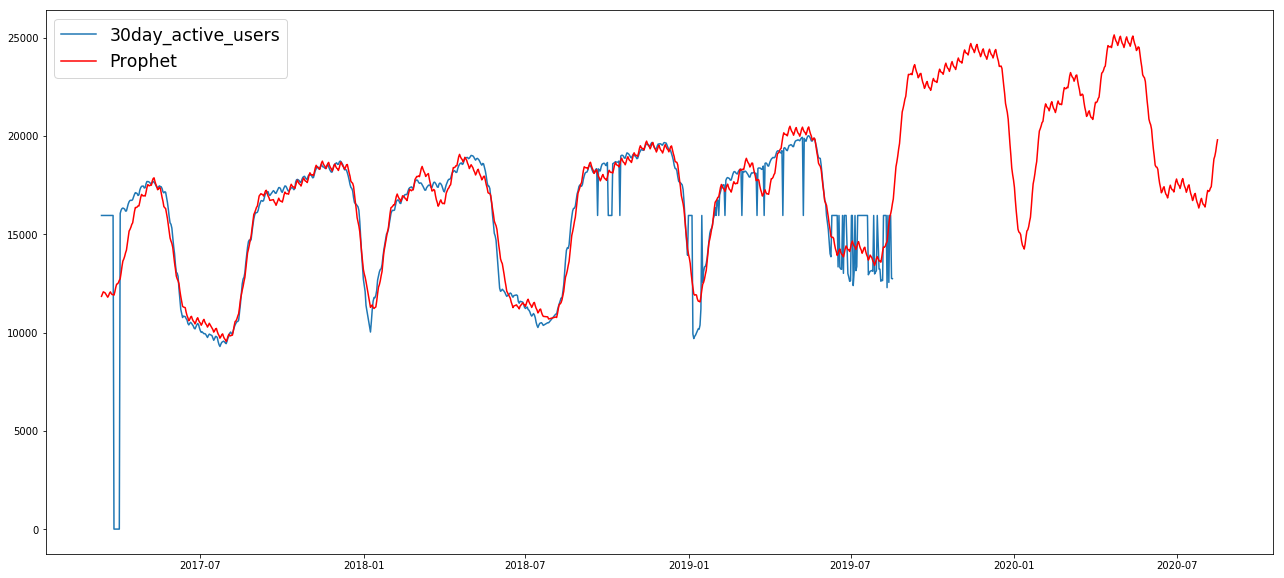

In [33]:
plot(five_att,prediction,True)

In [34]:
prediction.head()

,time,1day_active_users,30day_active_users
0,2017-03-12,2536.031583,11841.085243
1,2017-03-14,4420.806798,12069.931256
2,2017-03-16,4265.215938,12019.552882
3,2017-03-19,3151.410971,11796.214199
4,2017-03-20,4944.922844,11880.273600


In [35]:

prediction1 = prediction.copy()

In [36]:
five_att = pick_your_number(1)

you picked google drive 1day active users and 30 day active users


In [37]:
cbt, cbt2 = fill_zero(five_att,prediction1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


IndexError: single positional indexer is out-of-bounds